## GUIA 2

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import mode
import qpsolvers as qp
from scipy.sparse import csc_matrix
from sklearn.svm import SVC

## Ejercicio 1


![image.png](enunciados/ej1.png)

Comenzamos definiendo las variables y los datos que nos da el enunciado

Y : "Bit emitido"

X : "Bit recibido"

P(Y = 1) = 3/4 : Probabilidad de que el bit emitido sea 1

P(Y = 0) = 1/4 : Probabilidad de que el bit emitido sea 0

X|Y=0 ~ N(0,4) : Distribucion del bit recibido, dado que se emitio un 0

X|Y=1 ~ N(0,1) : Distribucion del bit recibido, dado que se emitio un 0

a) 

$p_X(x) = P(Y = 0) \cdot p_{X|Y=0}(x) + P(Y = 1) \cdot p_{X|Y=1}(x)$


$p_{X|Y=0}(x) = \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})$

$p_{X|Y=1}(x) = \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$

Entonces queda que

$p_X(x) = 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$


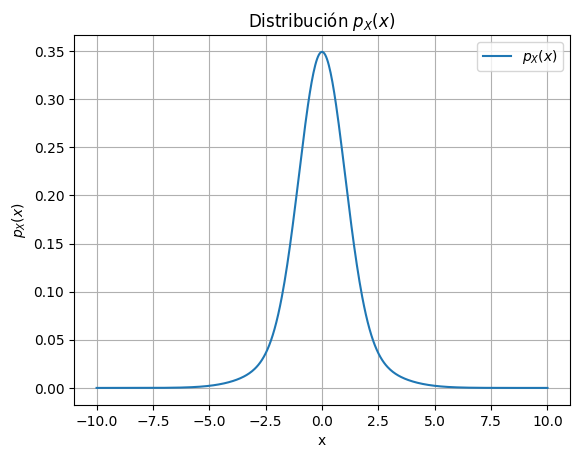

In [13]:
# Rango de X
x = np.linspace(-10, 10, 500)

p_Y1 = 0.75
p_Y0 = 0.25

# Normales
pX_dado_Y0 = p_Y0 * norm.pdf(x, 0, np.sqrt(4))
pX_dado_Y1 = p_Y1 * norm.pdf(x, 0, np.sqrt(1))

# Las sumo
p_X = pX_dado_Y0 + pX_dado_Y1

# Grafico
plt.plot(x, p_X, label=r'$p_X(x)$')
plt.title(r'Distribución $p_X(x)$')
plt.xlabel('x')
plt.ylabel(r'$p_X(x)$')
plt.legend()
plt.grid(True)

b) Para calcular $p_{Y|X}(1|x)$ podemos usar el Teorema de Bayes

$p_{Y|X}(1|x) = \frac{p_{X|Y}(x|1) \cdot p_Y(1)}{p_X(x)}$

Tenemos que

$p_{X|Y}(x|1) = \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$

$p_Y(1) = 0.75$

$p_X(x) = 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$

Entonces reemplazando queda:

$p_{Y|X}(1|x) = \frac{0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})}{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})} $




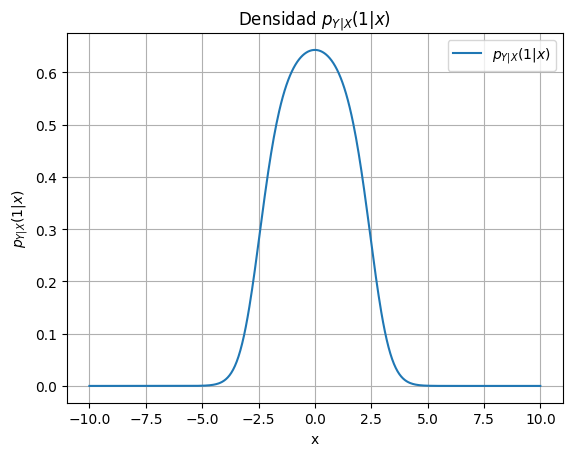

In [14]:
# Defino
pY_dado_X1 = (pX_dado_Y1 * p_Y1) / p_X

# Graficar
plt.plot(x, pY_dado_X1, label=r'$p_{Y|X}(1|x)$')
plt.title(r'Densidad $p_{Y|X}(1|x)$')
plt.xlabel('x')
plt.ylabel(r'$p_{Y|X}(1|x)$')
plt.legend()
plt.grid(True)


c) Primero calculamos $p_{Y|X}(0|x)$ de la misma forma que el inciso anterior

$p_{Y|X}(0|x) = \frac{p_{X|Y}(x|0) \cdot p_Y(0)}{p_X(x)}$

Con:

$p_{X|Y}(x|0) = \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) $

$p_Y(0) = 0.25$

$p_X(x) = 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$

Reemplazando:

$p_{Y|X}(0|x) = \frac{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})}{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})}$


Ahora:

$P_{Y|X}(1|x) > P_{Y|X}(0|x)$

$\frac{0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})}{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})} > \frac{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})}{0.25 \cdot \frac{1}{ 2 \sqrt {2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})}$

$ 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2}) > 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})$

$0.75 \cdot  exp(-\frac{x^2}{2}) > 0.125 \cdot exp(-\frac{x^2}{8}) $

$6 \cdot exp(-\frac{3x^2}{8}) > 1 $

$|x| < \sqrt{\frac{8 \cdot Ln(6)}{3}} $

$|x| < 2.1858694$



d) El Error Bayesiano se calcula como $1 - E[max_{y} P_{Y|X}(y|X)]$

Para desarrollar el termino de la Esperanza se deben separar las integrales en distintos intervalos ya que el valor maximo de las probabilidades condicionales varia (estos intervalos se calcularon en el ejercicio anterior).

Una de las integrales ira desde $-\infty$ hasta $-x_0 = 2.18587$, otra ira desde $-x_0$ hasta $x_0$, y la tercera ira desde $x_0$ hasta $\infty$

$E[max_{y} P_{Y|X}(y|X)] = \int_{-\infty}^{x_0} P(Y=0|X) \cdot P(X=x) dx + \int_{-x_0}^{x_0} P(Y=1|X) \cdot P(X=x) dx + \int_{x_0}^{\infty} P(Y=0|X) \cdot P(X=x))$

$E[max_{y} P_{Y|X}(y|X)] = \int_{-\infty}^{x_0} 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) dx + \int_{-x_0}^{x_0} 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2}) dx + \int_{x_0}^{\infty} 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})dx$

Siendo $\Phi(z)$ la funcion de distribucion de una normal estandar N(0,1)

$\Phi(z) = \int_{-\infty}^{z} \frac{1}{\sqrt{2 \pi}} exp (-\frac{t^2}{2})dt$

Podemos normalizar de la siguiente manera

- Para X|Y=0 usamos $Z = \frac{X}{2}$ 
- Para X|Y=1 podemos usar directamente $\Phi(z)$

Entonces:

- $\int_{-\infty}^{x_0} 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) dx = 0.25 \Phi(-\frac{x_0}{2})$

- $\int_{-x_0}^{x_0} 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2}) dx = 0.75 \cdot (\int_{-\infty}^{x_0} \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2}) - \int_{-\infty}^{-x_0} \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})) = 0.75 \cdot (\Phi(x_0) - \Phi(-x_0)) = 0.75 \cdot (2\Phi(x_0) -1)$

- $\int_{x_0}^{\infty} 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})dx = 0.25 \cdot (1 - \int_{-\infty}^{x_0}\frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})dx ) = 0.25 \cdot (1 - \Phi(\frac{x_0}{2}))$


Reemplazando en la formula del error bayesiano:

$Eb = 1 - (0.25 \Phi(-\frac{x_0}{2}) + 0.75 \cdot (2\Phi(x_0) -1) +  0.25 \cdot (1 - \Phi(\frac{x_0}{2})))$

$Eb = \frac{5}{4} - \frac{3}{2} \Phi(x_0) + \frac{1}{2} \Phi(\frac{x_0}{2}) $

### Ejercicio 2

![image.png](enunciados/ej2.png)

Definimos las variables que tenemos

$p \sim Ber(\frac{1}{2})$

$q \sim Ber(\frac{1}{3})$

La Divergencia de Kullback Leibler se calcula como

$KL(p||q) = E_{p_x}[ln(\frac{p_X(X)}{q_X(X)})]$


En este caso:

$KL(p||q) = \sum _x Ln(\frac{p_X(X)}{q_X(X)}) \cdot p_X(x) $

$KL(p||q) = p_X(0) \cdot ln(\frac{p_X(0)}{q_X(0)}) + p_X(1) \cdot ln(\frac{p_X(1)}{q_X(1)}) $

$KL(p||q) = p  \cdot ln(\frac{p}{q}) + (1-p) \cdot ln(\frac{1-p}{1-q}) $

Reemplazando por los valores de p=1/2 y q=1/3

$KL(p||q) = 0.1438$


Para la Divergencia de Kullback Leibler en sentido inverso $KL(q||p)$ se tiene

$KL(q||p) = E_{q_x}[ln(\frac{q_X(X)}{p_X(X)})] $

En este caso queda 

$KL(q||p) = q  \cdot ln(\frac{q}{p}) + (1-q) \cdot ln(\frac{1-q}{1-p})$

$KL(q||p) = 0.1308 $



### Ejercicio 3

![image.png](enunciados/ej3.png)

a) Comenzamos definiendo la funcion sigmoide como 


$\sigma(z) = \frac{1}{1 + e^{-z}} = p$

Pasamos el denominador multiplicando para el otro lado

$p \cdot (1 + e^{-z}) = 1 $

Distribuimos y despejamos la exponencial

$ e^{-z} = \frac{1 - p}{p}$

Aplicamos ln() a ambos lados

$z = - ln(\frac{1 - p}{p})$




b) y c) La derivada de la funcion sigmoide se calcula de la siguiente manera

$ \sigma'(z) = \frac{d}{dz} (\frac{1}{1 + e^{-z}}) = e^{-z} \cdot \frac{1}{(1 + e^{-z})^2}$


$\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z)) $

Entonces,

$\sigma'(z) = p \cdot (1 - p)$

Para los valores infimos y supremos, analizamos el dominio de $\sigma(z) \in (0,1)$

En el caso del minimo

Cuando p = 0, $\sigma'(z)$ = 0

Cuando p = 1, $\sigma'(z)$ = 0

Por otro lado, para el maximo, si distribuimos p, se obtiene que $\sigma'(z) = p - p^2$

Vemos que su maximo se alcanza cuando $p = \frac{1}{2}$

Reemplazamos el valor de $p = \frac{1}{2}$ en $\sigma'(z)$ y obtenemos su minimo valor $\frac{1}{4}$


Entonces, finalmente queda que:

- El valor mínimo de $\sigma'(z)$ es 0 y se alcanza cuando p = 0 o p = 1
- El valor máximo de $\sigma'(z)$ es 1/4 y se alcanza cuando p = 1/2


### Ejercicio 4

![image.png](enunciados/ej4.png)

In [71]:
# Cargamos los datos
data = np.loadtxt('recursos/parcialitos.txt')

#del data


a) La funcion costo de la Regresión Logística Binaria es

$l(X_i, Y_i) = Y_i \cdot \ln(\sigma(w^T \cdot X_i + b)) + (1-Y_i) \cdot \ln( 1 - \sigma(w^T \cdot X_i + b)) $

Siendo la funcion Sigmoide

$\sigma(z) = \frac{1}{1 + e^{-z}} $

Si evaluamos la funcion sigmoide de la siguiente manera $\sigma(w^T \cdot X_i + b)$ se obtiene

$\sigma(w^T \cdot X_i + b) = \frac{1}{1 + e^{-(w^T \cdot X_i + b)}}$

Reemplazando en la funcion de costo se obtiene

$l(X_i, Y_i) = Y_i \cdot  \ln (\frac{1}{1 + e^{-(w^T \cdot X_i + b)}}) +  (1-Y_i) \cdot \ln(1 - \frac{1}{1 + e^{-(w^T \cdot X_i + b)}})$

Operando con propiedades y simplificando se obtiene que

$l(X_i, Y_i) = -(w^T \cdot X_i + b) - \ln{(1 + e^{-(w^T \cdot X_i + b)})} + Y_i \cdot (w^T \cdot X_i + b ) $

$ l(X_i, Y_i) = - \ln{(1 + e^{-(w^T \cdot X_i + b)})} + (Y_i - 1) \cdot (w^T \cdot X_i + b) $

Con uno de los resultados anteriores podemos calcular el gradiente

$l(X_i, Y_i) = Y_i \cdot  \ln (\sigma(z)) +  (1-Y_i) \cdot \ln(1 - \sigma(z))$

$\nabla l(X_i, Y_i) = Y_i \cdot \frac{1}{\sigma(z)} \cdot \sigma(z) \cdot (1-\sigma(z)) + (1-Y_i) \cdot \frac{1}{1-\sigma(z)} \cdot (-\sigma(z)) \cdot (1 - \sigma(z)) \cdot X_i $

$\nabla l(X_i, Y_i) = Y_i \cdot X_i \cdot (1 - \sigma(z)) - (1 - Y_i) \nabla l(X_i, Y_i) \cdot \sigma(z) \cdot$

$\nabla l(X_i, Y_i) = X_i \cdot (Y_i - \sigma(z)) $













El modelo predice que un estudiante con notas 45 y 85 está Aprobado.


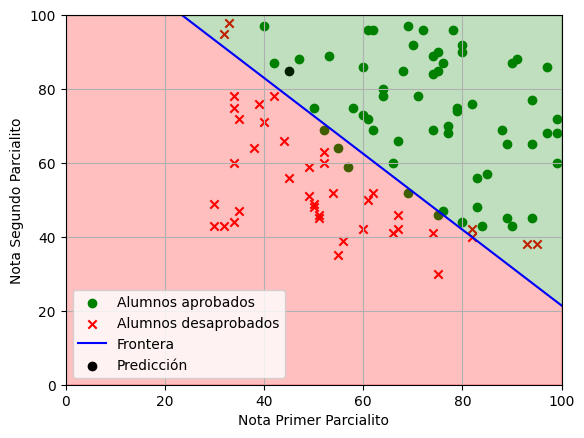

In [70]:
# b) y c)

resultados_parcialitos = data[:,0:2]
aprobados = data[:, 2]

reg_logistica = LogisticRegression()

reg_logistica.fit(resultados_parcialitos, aprobados)

alumnos_aprobados = np.where(aprobados==1)
alumnos_desaprobados = np.where(aprobados==0)

x = np.linspace(0, 100, 100)
w1, w2 = reg_logistica.coef_.T
b = reg_logistica.intercept_[0]
ordenada = -b/w2
pendiente = -w1/w2
frontera = pendiente * x + ordenada

# Prediccion
nota1 = 45
nota2 = 85
prediccion = reg_logistica.predict([[nota1, nota2]])
resultado_prediccion = 'Aprobado' if prediccion[0] == 1 else 'Desaprobado'


plt.scatter(resultados_parcialitos[alumnos_aprobados, 0], resultados_parcialitos[alumnos_aprobados, 1], color='green', marker='o', label='Alumnos aprobados')
plt.scatter(resultados_parcialitos[alumnos_desaprobados, 0], resultados_parcialitos[alumnos_desaprobados, 1], color='red', marker='x', label='Alumnos desaprobados')
plt.plot(x, frontera, label='Frontera', color='blue')
plt.scatter(nota1, nota2, color='black', label='Predicción')
plt.fill_between(x, frontera, 0 ,color='red', alpha=0.25)
plt.fill_between(x, frontera, 100, color='green', alpha=0.25)
plt.xlabel('Nota Primer Parcialito')
plt.ylabel('Nota Segundo Parcialito')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid()
plt.legend()

print(f'El modelo predice que un estudiante con notas 45 y 85 está {resultado_prediccion}.')


#del resultados_parcialitos, aprobados, reg_logistica, alumnos_aprobados, alumnos_desaprobados, x, w1, w2, b, ordenada, pendiente, frontera, nota1, nota2, prediccion, resultado_prediccion


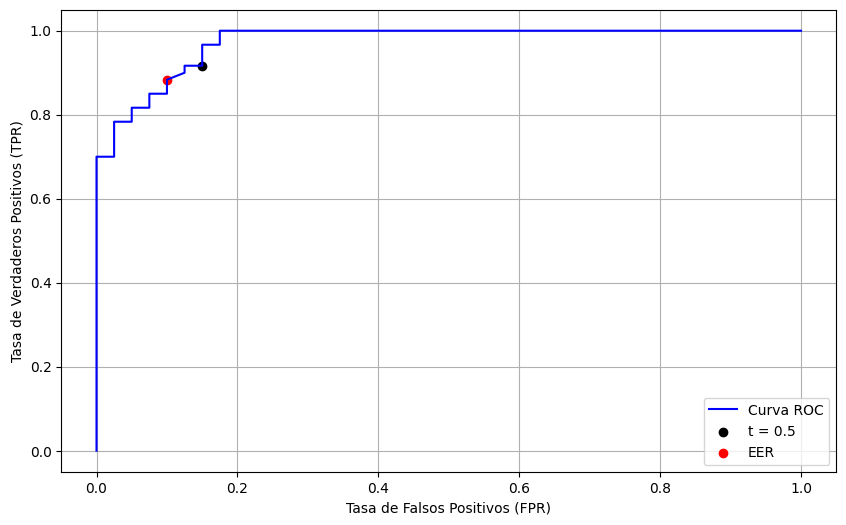

In [69]:
# d)

# Prob de las clases

y_prob = reg_logistica.predict_proba(resultados_parcialitos)[:, 1]

thresholds = np.arange(0.0, 1.1, 0.01)
tpr_list = []
fpr_list = []

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    tp = np.sum((y_pred == 1) & (aprobados == 1))
    fp = np.sum((y_pred == 1) & (aprobados == 0))
    tn = np.sum((y_pred == 0) & (aprobados == 0))
    fn = np.sum((y_pred == 0) & (aprobados == 1))
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)

fpr = np.array(fpr_list)
tpr = np.array(tpr_list)

# Calcular el EER
eer_index = np.argmin(np.abs(fpr - (1 - tpr)))




plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC')
plt.scatter(fpr[50], tpr[50], color='black', label = 't = 0.5')
plt.scatter(fpr[eer_index], tpr[eer_index], color='red', label = 'EER')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend()
plt.grid()

#del y_prob, threshold, thresholds, fpr_list, tpr_list, y_pred, tp, fp, tn, fn, tpr, fpr, eer_index



### Ejercicio 5

![image.png](enunciados/ej5.png)

In [3]:
# Cargamos los datos
data = np.loadtxt('recursos/microchips.txt', delimiter=',')

#del data


En el caso del archivo provisto, se puede observar que se cuenta con un total de $n = 2$ features, que llamaremos $x_1$ y $x_2$. Como se nos pide realizar un polinomio de grado $d = 6$, necesitariamos encontrar el total de la cantidad de combinaciones de monomios posibles que pueden representar un polinomio de ese grado. Por ejemplo

$P = x_1^4 \cdot x_2^2$ es una posibilidad 

$P =  x_2^6$ tambien

Cada combinacion de $x_1$ y $x_2$ hasta el grado $d$ genera un nuevo termino en el modelo. Entonces, la cantidad de combinaciones posibles de lo terminos que podemos formar con $n$ caracteristicas, hasta el grado $d$ es

Cant. de parametros = $\frac{(n + d)!}{n! \cdot d!}$ = 28

In [12]:
# Separamos los datos del archivo

resultado_pruebas = data[:, 0:2]
resultado_inspeccion = data[:, 2]

# Cremos el polinomio de grado 6

poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(resultado_pruebas)
# X_poly contiene todas las combinaciones polinómicas de las características 
# hasta el grado 6, que como vimos antes, son 28


#del resultado_pruebas, resultado_inspeccion, poly, X_poly


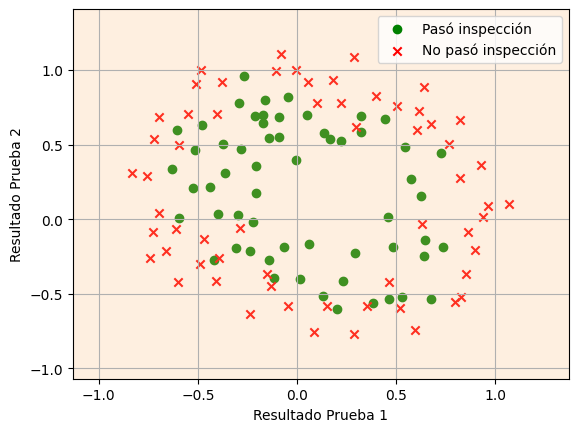

In [17]:
# c) 

# Definimos el parametro de regularizacion

lambda_regularizacion = 1000

reg_logistica_1000 = LogisticRegression(C = 1/lambda_regularizacion, penalty='l2', max_iter=10000)

# Entrenamos el nuevo modelo
reg_logistica_1000.fit(X_poly, resultado_inspeccion)


# Grafico el resultado de las pruebas
plt.scatter(resultado_pruebas[resultado_inspeccion == 1][:, 0], resultado_pruebas[resultado_inspeccion == 1][:, 1], color='green', marker='o', label='Pasó inspección')
plt.scatter(resultado_pruebas[resultado_inspeccion == 0][:, 0], resultado_pruebas[resultado_inspeccion == 0][:, 1], color='red', marker='x',label='No pasó inspección')
plt.xlabel('Resultado Prueba 1')
plt.ylabel('Resultado Prueba 2')
plt.legend()
plt.grid()

# Creamos malla para la frontera
x_min, x_max = resultado_pruebas[:, 0].min() - 0.3, resultado_pruebas[:, 0].max() + 0.3
y_min, y_max = resultado_pruebas[:, 1].min() - 0.3, resultado_pruebas[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predecir sobre la malla de puntos con el nuevo modelo entrenado
prediccion_1000 = reg_logistica_1000.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
prediccion_1000 = prediccion_1000.reshape(xx.shape)

# Graficar la frontera de decisión
plt.contourf(xx, yy, prediccion_1000, alpha=0.25, cmap='Accent')


#del lambda_regularizacion, reg_logistica_1000, x_min, x_max, y_min, y_max, xx, yy, prediccion_1000



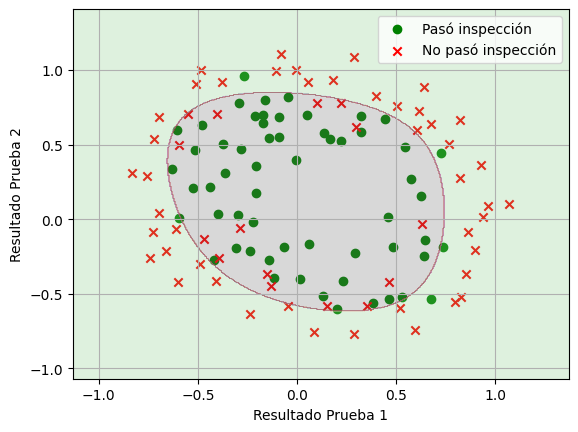

In [16]:
# d) muy paredico al c), pero cambiamos el valor del lambda 

# Definimos el parametro de regularizacion

lambda_regularizacion = 1

reg_logistica_1 = LogisticRegression(C = 1/lambda_regularizacion, penalty='l2', max_iter=10000)

# Entrenamos el nuevo modelo
reg_logistica_1.fit(X_poly, resultado_inspeccion)


# Grafico el resultado de las pruebas
plt.scatter(resultado_pruebas[resultado_inspeccion == 1][:, 0], resultado_pruebas[resultado_inspeccion == 1][:, 1], color='green', marker='o', label='Pasó inspección')
plt.scatter(resultado_pruebas[resultado_inspeccion == 0][:, 0], resultado_pruebas[resultado_inspeccion == 0][:, 1], color='red', marker='x',label='No pasó inspección')
plt.xlabel('Resultado Prueba 1')
plt.ylabel('Resultado Prueba 2')
plt.legend()
plt.grid()

# Creamos malla para la frontera
x_min, x_max = resultado_pruebas[:, 0].min() - 0.3, resultado_pruebas[:, 0].max() + 0.3
y_min, y_max = resultado_pruebas[:, 1].min() - 0.3, resultado_pruebas[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predecir sobre la malla de puntos con el nuevo modelo entrenado
prediccion_1 = reg_logistica_1.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
prediccion_1 = prediccion_1.reshape(xx.shape)

# Graficar la frontera de decisión
plt.contourf(xx, yy, prediccion_1, alpha=0.25, cmap='Accent')


#del lambda_regularizacion, reg_logistica_1, x_min, x_max, y_min, y_max, xx, yy, prediccion_1

### Ejercicio 6

![image.png](enunciados/ej6.png)

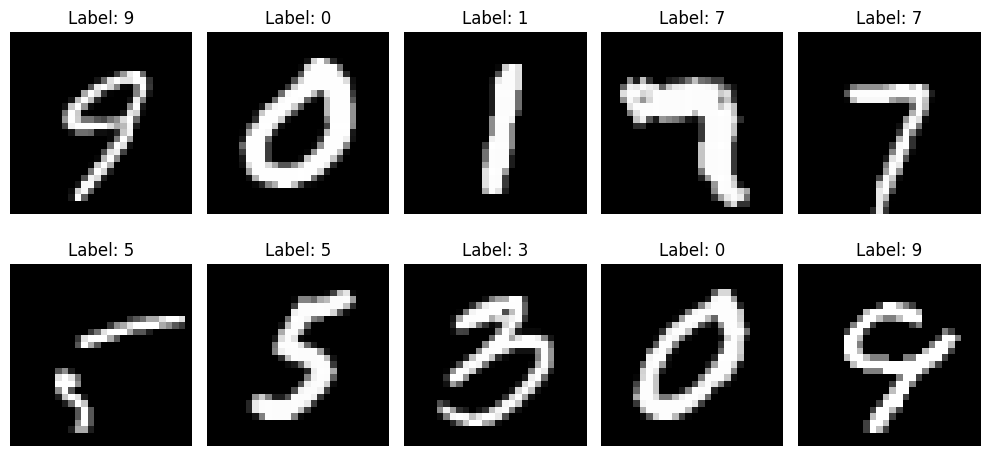

In [57]:
# a)

# Cargar la base de datos MNIST
# Cada imagen es de tamaño 28×28 píxeles y tiene un solo canal en escala de grises
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Elijo 10 indices aleatorios, que no se repitan
ran_index = np.random.choice(len(x_test), 10, replace=False)

# Guardo las imagenes y los labels (nombres)
ran_images = x_test[ran_index]
ran_labels = y_test[ran_index]

# Crear una figura para representar las imágenes
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(ran_images[i], cmap='gray')
    plt.title(f"Label: {ran_labels[i]}")
    plt.axis('off')

plt.tight_layout()

#del x_train, y_train, x_test, y_test, ran_index, ran_images, ran_labels, i


In [56]:
# b) 

x_train1 = x_train.reshape(-1, 28*28)  # Convertir de 28x28 a vector de 784
x_test1 = x_test.reshape(-1, 28*28)

# Le bajo un poco la cantidad de iteraciones para que no tarde tanto
log_reg = LogisticRegression(max_iter=200)

# Entrenar el modelo
log_reg.fit(x_train1, y_train)

# Predecir en el conjunto de entrenamiento y testeo
y_train_pred = log_reg.predict(x_train1)
y_test_pred = log_reg.predict(x_test1)

# Calcular el accuracy en el conjunto de entrenamiento y testeo
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Mostrar los resultados
print(f"Accuracy de entrenamiento: {train_accuracy:.4f}")
print(f"Accuracy de testeo: {test_accuracy:.4f}")


#del x_train1, x_test1, log_reg, y_train_pred, y_test_pred, train_accuracy, test_accuracy




C:\Users\joaqu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy de entrenamiento: 0.9375
Accuracy de testeo: 0.9225


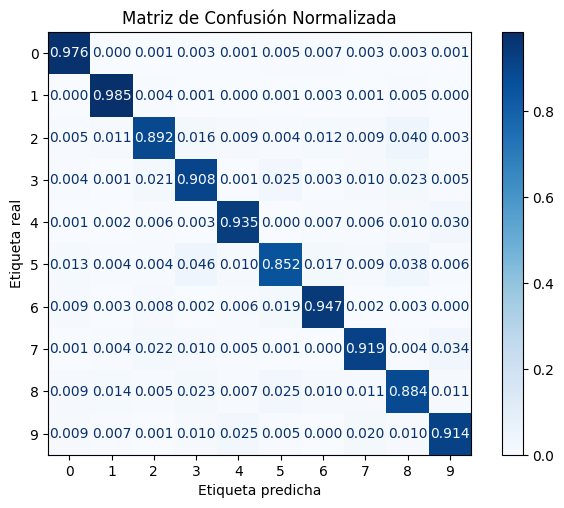

In [55]:
# c)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred, normalize='true')

# Mostrar la matriz de confusión con formato de 3 decimales
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues, values_format='.3f')
plt.tight_layout(pad=0.5) #Ajusto un poco el espaciado, sino quedaba todo muy junto
plt.title('Matriz de Confusión Normalizada')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta real')
plt.show()

#del cm, disp


### Ejercicio 7

![image.png](enunciados/ej7.png)

In [82]:
# Cargamos los datos 

data = pd.read_csv('recursos/formantes.txt', sep='\t', header=None, names=['Formante1', 'Formante2', 'Formante3', 'Vocal'])


#del data

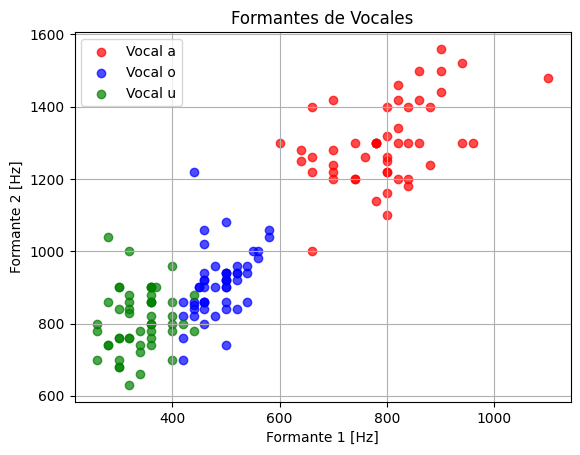

In [81]:
# a)

# Extraer las columnas relevantes
X = data[['Formante1', 'Formante2']].values
y = data['Vocal']


# Colores para cada vocal
colors = {'a':'red', 'o':'blue', 'u':'green'}

# Graficar cada vocal con un color diferente
for vocal in colors.keys():
    subset = data[data['Vocal'] == vocal]
    plt.scatter(subset['Formante1'], subset['Formante2'], c=colors[vocal], label=f'Vocal {vocal}', alpha=0.7)
plt.xlabel('Formante 1 [Hz]')
plt.ylabel('Formante 2 [Hz]')
plt.title('Formantes de Vocales')
plt.legend()
plt.grid()

#del X, y, colors, vocal, subset

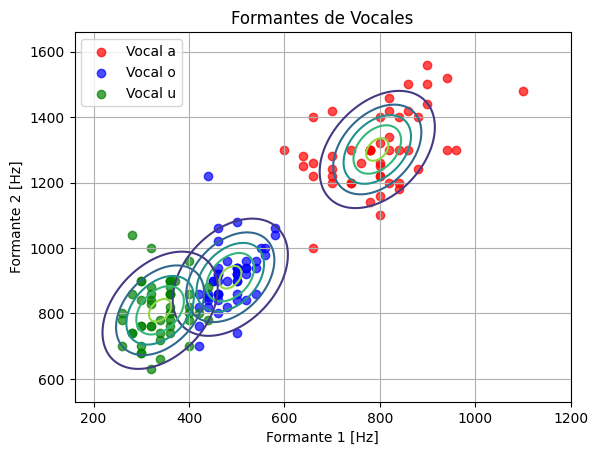

In [80]:
# b) 

# Graficar cada vocal con un color diferente
for vocal in colors.keys():
    subset = data[data['Vocal'] == vocal]
    plt.scatter(subset['Formante1'], subset['Formante2'], c=colors[vocal], label=f'Vocal {vocal}', alpha=0.7)
plt.xlabel('Formante 1 [Hz]')
plt.ylabel('Formante 2 [Hz]')
plt.title('Formantes de Vocales')
plt.legend()
plt.grid()


#Entrenamos el modelo

lda = LDA()
lda.fit(X, y)

medias = lda.means_

# Con esta covarianza me da raro el grafico, asi que la calculo de otra manera
#covarianza = np.cov(X.T)

#covarianza_a = np.cov(data.loc[data['Vocal']=='a'].drop(2, axis=1))

#Se me esta haciendo dificil trabajar con los datos de data[], asi que los voy a separar en cada formante

form_a = data.loc[data['Vocal'] == 'a']
form_a = form_a.drop('Vocal', axis=1).drop('Formante3', axis=1).values
form_o = data.loc[data['Vocal'] == 'o']
form_o = form_o.drop('Vocal', axis=1).drop('Formante3', axis=1).values
form_u = data.loc[data['Vocal'] == 'u']
form_u = form_u.drop('Vocal', axis=1).drop('Formante3', axis=1).values


covarianza_a = np.cov(form_a, rowvar=False)
covarianza_o = np.cov(form_o, rowvar=False)
covarianza_u = np.cov(form_u, rowvar=False)

covarianza_aou = [covarianza_a, covarianza_o, covarianza_u]

#Dk = cantidad de datos de la clase k
#Dk = np.array([len(data['Vocal']=='a'), len(data['Vocal']=='o'), len(data['Vocal']=='u')]).reshape(-1, 1)
Dk = np.array([len(form_a), len(form_o), len(form_u)]).reshape(-1, 1)
#Datos totales
cant_datos = len(data)
cant_vocales = Dk.shape[0]

covarianza = np.sum((Dk - 1).reshape(-1, 1, 1) * covarianza_aou, axis=0) / (cant_datos - cant_vocales)

#Creamos la malla para graficar

x_min, x_max = X[:, 0].min() - 100, X[:, 0].max() + 100
y_min, y_max = X[:, 1].min() - 100, X[:, 1].max() + 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

norm_multivar_a = multivariate_normal(medias[0].reshape(-1), cov = covarianza)
dens_norm_multivar_a = norm_multivar_a.pdf(np.dstack((xx, yy)))
plt.contour(xx, yy, dens_norm_multivar_a, levels = 5)

norm_multivar_o = multivariate_normal(medias[1].reshape(-1), cov = covarianza)
dens_norm_multivar_o = norm_multivar_o.pdf(np.dstack((xx, yy)))
plt.contour(xx, yy, dens_norm_multivar_o, levels = 5)

norm_multivar_u = multivariate_normal(medias[2].reshape(-1), cov = covarianza)
dens_norm_multivar_u = norm_multivar_u.pdf(np.dstack((xx, yy)))
plt.contour(xx, yy, dens_norm_multivar_u, levels = 5)



#del lda, medias, covarianza, x_min, x_max, y_min, y_max, xx, yy, form_a, form_o, form_u
#del covarianza_a, covarianza_o, covarianza_u, covarianza_aou, Dk, cant_datos, cant_vocales, 
#del norm_multivar_a, dens_norm_multivar_a, norm_multivar_o, dens_norm_multivar_o, norm_multivar_u, dens_norm_multivar_u



In [79]:
# c)

# Probabilidades cy de cada clase

cy = (Dk/cant_datos).reshape(-1)

# Los coeficientes de discrimintnte para cada clase se calculan como
# wx = Cx^-1 * mu_x

def predictor_clase(medias, covarianza, cy, datos):

    covarianza_inv = np.linalg.inv(covarianza)

    wa = covarianza_inv @ medias[0]
    wo = covarianza_inv @ medias[1]
    wu = covarianza_inv @ medias[2]

    ba = -0.5 * medias[0].T @ covarianza_inv @ medias[0] + np.log(cy[0])
    bo = -0.5 * medias[1].T @ covarianza_inv @ medias[1] + np.log(cy[1])
    bu = -0.5 * medias[2].T @ covarianza_inv @ medias[2] + np.log(cy[2])

    #Ejemplo
    x = datos

    result = np.zeros((len(x), 3))

    for i in range(len(x)):
        result[i, 0] = np.inner(wa.reshape(-1), x[i, :]) + ba
        result[i, 1] = np.inner(wo.reshape(-1), x[i, :]) + bo
        result[i, 2] = np.inner(wu.reshape(-1), x[i, :]) + bu

    resultado = np.argmax(result, axis = 1)

    return resultado

r1 = predictor_clase(medias, covarianza, cy, form_a)
r2 = predictor_clase(medias, covarianza, cy, form_o)
r3 = predictor_clase(medias, covarianza, cy, form_u)

print(r1)
#Deberian printearse muchos 0's porque es el indice de la formante de 'a'
print(r2)
#Deberian printearse muchos 1's porque es el indice de la formante de 'o'
print(r3)
#Deberian printearse muchos 2's porque es el indice de la formante de 'u'


#del cy, r1, r2, r3

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1]


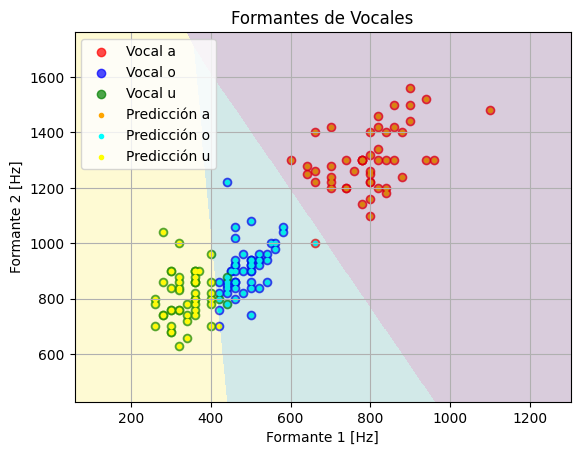

In [78]:
# d) 

form_aou = np.concatenate((form_a, form_o, form_u), axis = 0)

resultado_pred = predictor_clase(medias, covarianza, cy, form_aou)



# Graficar cada vocal con un color diferente
for vocal in colors.keys():
    subset = data[data['Vocal'] == vocal]
    plt.scatter(subset['Formante1'], subset['Formante2'], c=colors[vocal], label=f'Vocal {vocal}', alpha=0.7)
plt.xlabel('Formante 1 [Hz]')
plt.ylabel('Formante 2 [Hz]')
plt.title('Formantes de Vocales')
plt.legend()
plt.grid()


pred_a = form_aou[resultado_pred == 0]
pred_o = form_aou[resultado_pred == 1]
pred_u = form_aou[resultado_pred == 2]

plt.scatter(pred_a[:, 0], pred_a[:, 1], color='orange', marker='.', label='Predicción a')
plt.scatter(pred_o[:, 0], pred_o[:, 1], color='cyan', marker='.', label='Predicción o')
plt.scatter(pred_u[:, 0], pred_u[:, 1], color='yellow', marker='.', label='Predicción u')

plt.legend()


# Fronteras

#xx = np.arange(np.min(form_aou[:, 0]) - 200, np.min(form_aou[:, 0]) - 200, 1)
#yy = np.arange(np.min(form_aou[:, 1]) - 200, np.min(form_aou[:, 1]) - 200, 1)
#xx_mesh, yy_mesh = np.meshgrid()

x_min, x_max = form_aou[:, 0].min() - 200, form_aou[:, 0].max() + 200
y_min, y_max = form_aou[:, 1].min() - 200, form_aou[:, 1].max() + 200
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Evaluo la mesh en el clasificador

resultado_mesh = predictor_clase(medias, covarianza, cy, np.c_[xx.ravel(), yy.ravel()])
resultado_mesh = resultado_mesh.reshape(xx.shape)
plt.pcolormesh(xx, yy, resultado_mesh, alpha=0.2)


#del form_aou, resultado_pred, subset, vocal, pred_a, pred_o, pred_u, x_min
#del x_max, y_min, y_max, xx, yy, resultado_mesh

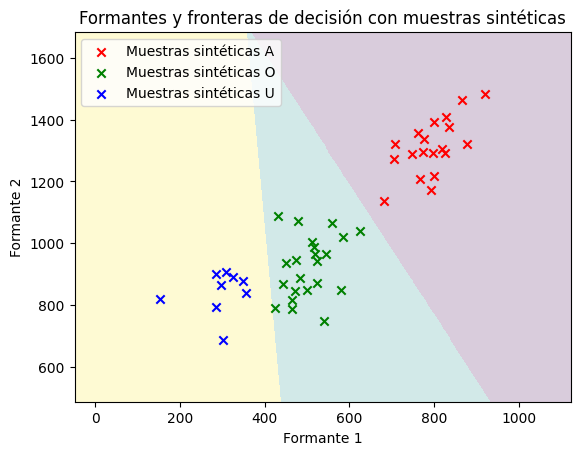

In [77]:
# e)

num_muestras = 50

num_muestras_clase = np.random.multinomial(num_muestras, cy)

sint_a = np.random.multivariate_normal(medias[0], covarianza, num_muestras_clase[0])
sint_o = np.random.multivariate_normal(medias[1], covarianza, num_muestras_clase[1])
sint_u = np.random.multivariate_normal(medias[2], covarianza, num_muestras_clase[2])

sint_aou = np.concatenate((sint_a, sint_o, sint_u), axis = 0)

# Asignar etiquetas para las muestras sintéticas (0 para /a/, 1 para /o/, 2 para /u/)
etiquetas_sinteticas = np.concatenate([np.zeros(num_muestras_clase[0]), 
                                       np.ones(num_muestras_clase[1]), 
                                       np.full(num_muestras_clase[2], 2)])


#resultado_pred = predictor_clase(medias, covarianza, cy, sint_aou)

x_min, x_max = sint_aou[:, 0].min() - 200, sint_aou[:, 0].max() + 200
y_min, y_max = sint_aou[:, 1].min() - 200, sint_aou[:, 1].max() + 200
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Evaluar frontera
resultado_mesh = predictor_clase(medias, covarianza, cy, np.c_[xx.ravel(), yy.ravel()])
resultado_mesh = resultado_mesh.reshape(xx.shape)

#Graficar frontera
plt.pcolormesh(xx, yy, resultado_mesh, alpha=0.2)


# Graficar las muestras sintéticas
plt.scatter(sint_a[:, 0], sint_a[:, 1], c='red', marker='x', label='Muestras sintéticas A')
plt.scatter(sint_o[:, 0], sint_o[:, 1], c='green', marker='x', label='Muestras sintéticas O')
plt.scatter(sint_u[:, 0], sint_u[:, 1], c='blue', marker='x', label='Muestras sintéticas U')

# Añadir leyenda y mostrar
plt.legend()
plt.xlabel("Formante 1")
plt.ylabel("Formante 2")
plt.title("Formantes y fronteras de decisión con muestras sintéticas")

#del num_muestras, num_muestras_clase, sint_a, sint_o, sint_u, sint_aou, etiquetas_sinteticas
#del x_min, x_max, y_min, y_max, xx, yy, resultado_mesh

### Ejercicio 8

![image.png](enunciados/ej8.png)

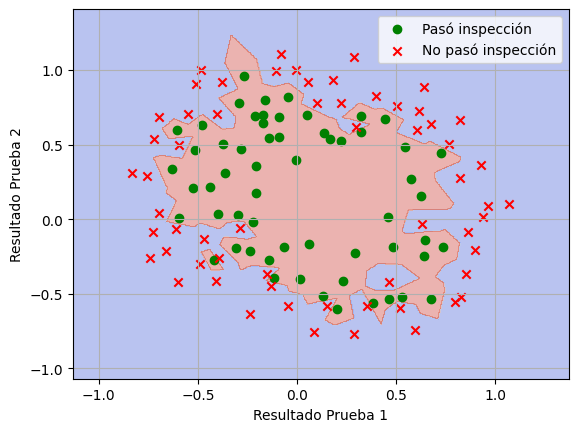

In [125]:
# a)

# Cargamos los datos
data = np.loadtxt('recursos/microchips.txt', delimiter=',')
resultado_pruebas = data[:, 0:2]
resultado_inspeccion = data[:, 2]

# Clasificador 1-NN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(resultado_pruebas, resultado_inspeccion)

# Creamos malla para la frontera
x_min, x_max = resultado_pruebas[:, 0].min() - 0.3, resultado_pruebas[:, 0].max() + 0.3
y_min, y_max = resultado_pruebas[:, 1].min() - 0.3, resultado_pruebas[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predecir las clases para cada punto de la malla
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

# Grafico el resultado de las pruebas
plt.scatter(resultado_pruebas[resultado_inspeccion == 1][:, 0], resultado_pruebas[resultado_inspeccion == 1][:, 1], color='green', marker='o', label='Pasó inspección')
plt.scatter(resultado_pruebas[resultado_inspeccion == 0][:, 0], resultado_pruebas[resultado_inspeccion == 0][:, 1], color='red', marker='x',label='No pasó inspección')
plt.xlabel('Resultado Prueba 1')
plt.ylabel('Resultado Prueba 2')
plt.legend()
plt.grid()


#del data, resultado_pruebas, resultado_inspeccion, knn, x_min, x_max, y_min, y_max
#del xx, yy, Z


Un clasificador del tipo 1-NN tiene un error de entrenamiento nulo. Como podemos ver en el grafico de arriba, todos los datos son clasificados de forma correcta, porque siempore se utiliza un unico vecino, que siempre es el mismo para cada una de las muestras. 

Sin embargo, podemos observar que la frontera de decision es muy "ruidosa" (quiero decir como que es poco uniforme, como con muchos cambios), lo cual se traduce en un over-fitting, y la hace muy sensible a las caracteristicas de los datos de entrenamiento. Esto puede ser un problema cuando se incorporan nuevos datos, y mas aun cuando estos nuevos datos no son similares a los que se utilizaron para el entrenamiento.

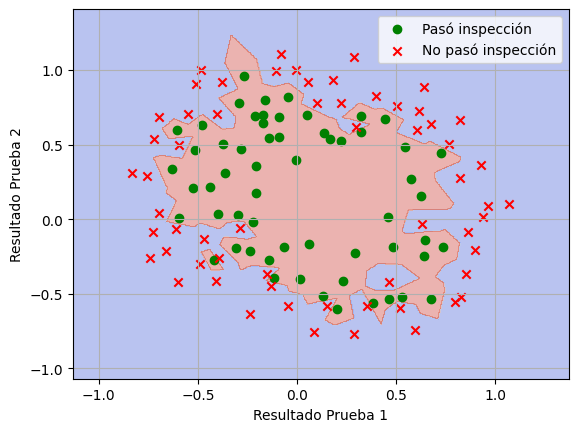

In [124]:
# a) pero implementando la funcion KNN
k = 1

def mi_knn(X_train, y_train, X_test, k):
    """
    Implementación simplificada de KNN.
    
    Parámetros:
    X_train: array de entrenamiento (muestras, features).
    y_train: etiquetas de entrenamiento.
    X_test: array de test (muestras, features) para las que se desea predecir la clase.
    k: número de vecinos más cercanos.
    
    Retorno:
    Predicciones para las muestras de test.
    """
    # Inicializar un array para almacenar las predicciones
    predicciones = np.zeros(X_test.shape[0])

    # Iterar sobre cada muestra de test
    for i, test_point in enumerate(X_test):
        # Calcular la distancia euclidiana desde el punto de test hasta todos los puntos de entrenamiento
        distancias = np.linalg.norm(X_train - test_point, axis=1)

        # Obtener los índices de las k distancias más pequeñas
        k_indices = np.argsort(distancias)[:k]

        # Obtener las etiquetas correspondientes a los k vecinos más cercanos
        k_labels = y_train[k_indices]

        # Predecir la clase como la moda (la clase más común) de los k vecinos
        moda = mode(k_labels)  # Obtener el resultado de la moda
        
        # Verificar si 'moda.mode' es escalar o tiene múltiples valores
        predicciones[i] = moda.mode[0] if isinstance(moda.mode, np.ndarray) else moda.mode
    
    return predicciones

#X_test = np.array([[-0.25, 1]])
#predicciones = mi_knn(resultado_pruebas, resultado_inspeccion, X_test, k=1)
#print(predicciones)

# Creamos malla para la frontera
x_min, x_max = resultado_pruebas[:, 0].min() - 0.3, resultado_pruebas[:, 0].max() + 0.3
y_min, y_max = resultado_pruebas[:, 1].min() - 0.3, resultado_pruebas[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
X_test_mesh = np.c_[xx.ravel(), yy.ravel()]

# Evaluamos los puntos de la malla usando la implementacion del algoritmo
Z = mi_knn(resultado_pruebas, resultado_inspeccion, X_test_mesh, k)
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

# Grafico el resultado de las pruebas
plt.scatter(resultado_pruebas[resultado_inspeccion == 1][:, 0], resultado_pruebas[resultado_inspeccion == 1][:, 1], color='green', marker='o', label='Pasó inspección')
plt.scatter(resultado_pruebas[resultado_inspeccion == 0][:, 0], resultado_pruebas[resultado_inspeccion == 0][:, 1], color='red', marker='x',label='No pasó inspección')
plt.xlabel('Resultado Prueba 1')
plt.ylabel('Resultado Prueba 2')
plt.legend()
plt.grid()

#del x_min, x_max, y_min, y_max, xx, yy, X_test_mesh, Z, k


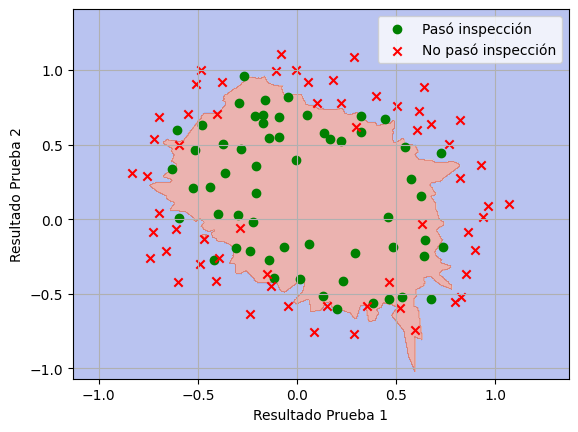

In [123]:
# b) 

k = 7

def mi_knn(X_train, y_train, X_test, k):
    """
    Implementación simplificada de KNN.
    
    Parámetros:
    X_train: array de entrenamiento (muestras, features).
    y_train: etiquetas de entrenamiento.
    X_test: array de test (muestras, features) para las que se desea predecir la clase.
    k: número de vecinos más cercanos.
    
    Retorno:
    Predicciones para las muestras de test.
    """
    # Inicializar un array para almacenar las predicciones
    predicciones = np.zeros(X_test.shape[0])

    # Iterar sobre cada muestra de test
    for i, test_point in enumerate(X_test):
        # Calcular la distancia euclidiana desde el punto de test hasta todos los puntos de entrenamiento
        distancias = np.linalg.norm(X_train - test_point, axis=1)

        # Obtener los índices de las k distancias más pequeñas
        k_indices = np.argsort(distancias)[:k]

        # Obtener las etiquetas correspondientes a los k vecinos más cercanos
        k_labels = y_train[k_indices]

        # Predecir la clase como la moda (la clase más común) de los k vecinos
        moda = mode(k_labels)  # Obtener el resultado de la moda
        
        # Verificar si 'moda.mode' es escalar o tiene múltiples valores
        predicciones[i] = moda.mode[0] if isinstance(moda.mode, np.ndarray) else moda.mode
    
    return predicciones

#X_test = np.array([[-0.25, 1]])
#predicciones = mi_knn(resultado_pruebas, resultado_inspeccion, X_test, k=1)
#print(predicciones)

# Creamos malla para la frontera
x_min, x_max = resultado_pruebas[:, 0].min() - 0.3, resultado_pruebas[:, 0].max() + 0.3
y_min, y_max = resultado_pruebas[:, 1].min() - 0.3, resultado_pruebas[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
X_test_mesh = np.c_[xx.ravel(), yy.ravel()]

# Evaluamos los puntos de la malla usando la implementacion del algoritmo
Z = mi_knn(resultado_pruebas, resultado_inspeccion, X_test_mesh, k)
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

# Grafico el resultado de las pruebas
plt.scatter(resultado_pruebas[resultado_inspeccion == 1][:, 0], resultado_pruebas[resultado_inspeccion == 1][:, 1], color='green', marker='o', label='Pasó inspección')
plt.scatter(resultado_pruebas[resultado_inspeccion == 0][:, 0], resultado_pruebas[resultado_inspeccion == 0][:, 1], color='red', marker='x',label='No pasó inspección')
plt.xlabel('Resultado Prueba 1')
plt.ylabel('Resultado Prueba 2')
plt.legend()
plt.grid()

#del x_min, x_max, y_min, y_max, xx, yy, X_test_mesh, Z, k

En este caso, comenzamos a observar que existe un error de entrenamiento, ya que hay muestras que pasaron la inspeccion, pero que quedan fuera de la frontera de decision (y viceversa tambien, hay muestras que no pasaron la inspeccion y quedan dentro de la frontera).

A medida que el K crece, el algoritmo aumenta su nivel de generalizacion (la frontera se "suaviza" un poco). Sirve para evaluar la tendencia general de los datos, ya que se tienen en cuenta mas vecinos cercanos al momento de tomar una decision. Un valor alto de K es una forma util de aumentar la regularizacion porque reduce la sensibilidad del algoritmo a pequeñas variaciones en los datos. 

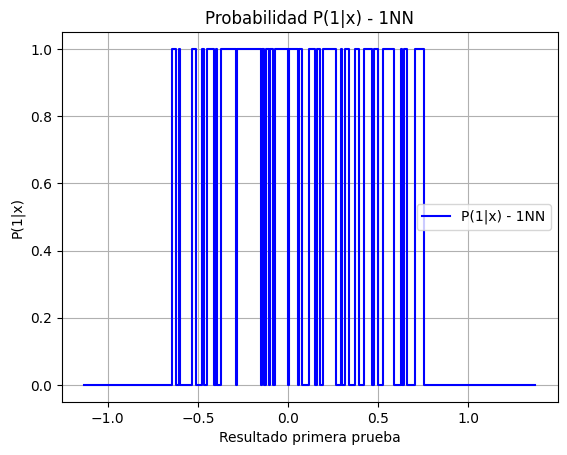

In [122]:
# c) 

# Extraigo unicamente el resultado de la primera prueba
resultado_prueba1 = data[:, 0:1]

# Generar valores para x
x_min, x_max = resultado_prueba1.min() - 0.3, resultado_prueba1.max() + 0.3
xx = np.linspace(x_min, x_max, 500).reshape(-1, 1)


k1nn = KNeighborsClassifier(n_neighbors=1)
k1nn.fit(resultado_prueba1, resultado_inspeccion)

k7nn = KNeighborsClassifier(n_neighbors=7)
k7nn.fit(resultado_prueba1, resultado_inspeccion)

# Predecir probabilidades
proba_1nn = k1nn.predict_proba(xx)[:, 1]  # Probabilidad de clase 1
proba_7nn = k7nn.predict_proba(xx)[:, 1]  # Probabilidad de clase 1


# Graficar probabilidades 1NN
plt.plot(xx, proba_1nn, label='P(1|x) - 1NN', color='blue', drawstyle="steps-post")
plt.title('Probabilidad P(1|x) - 1NN')
plt.xlabel('Resultado primera prueba')
plt.ylabel('P(1|x)')
plt.legend()
plt.grid()

#del resultado_prueba1, x_min, x_max, xx, k1nn, k7nn, proba_1nn, proba_7nn


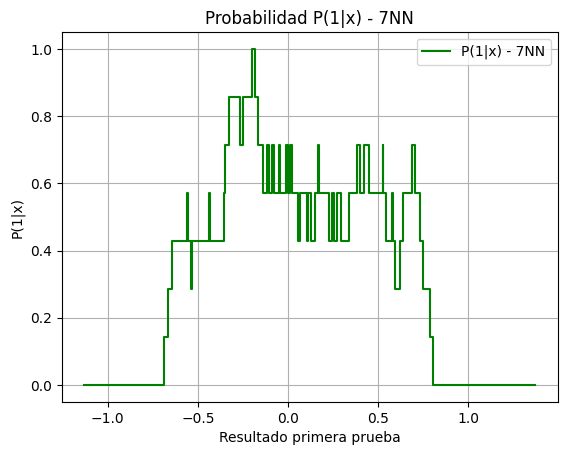

In [121]:
# Graficar probabilidades 7NN
plt.plot(xx, proba_7nn, label='P(1|x) - 7NN', color='green', drawstyle="steps-post")
plt.title('Probabilidad P(1|x) - 7NN')
plt.xlabel('Resultado primera prueba')
plt.ylabel('P(1|x)')
plt.legend()
plt.grid()

### Ejercicio 9

![image.png](enunciados/ej9.png)

In [19]:
# Cargamos los datos

with open('recursos/ejs_svm.pkl', 'rb') as file:
    data = pickle.load(file)

dataset1 = data['1er Dataset']
X = dataset1['X']
y = dataset1['y']

# Convertir etiquetas a {-1, 1}
y = np.where(y == 0, -1, y)

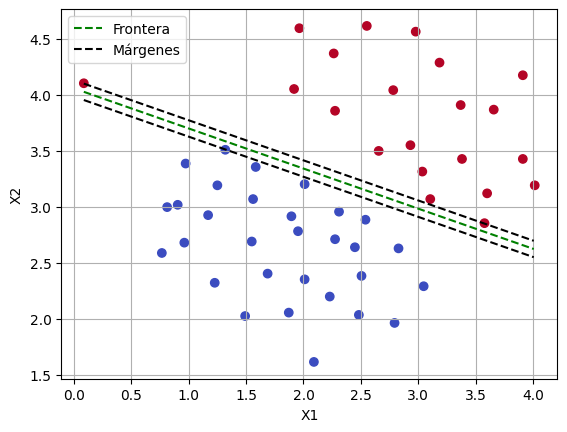

In [24]:
# a)

n_muestras, n_features = X.shape

P = np.eye(n_features + 1).astype(float)
P = csc_matrix(P) # Por un warning que aparecia
q = np.zeros(n_features + 1)
h = -np.ones(n_muestras)
G =  np.hstack((-y * X, -y))
#G = csc_matrix(G) # Por un warning que aparecia
solution = qp.solve_qp(P, q, G, h, solver='osqp')

# Extraer w y b
# Mi vector de soluciones tiene en las primeras 2 filas a w1 y w2
# Y en la ultima fila esta b
w = solution[:-1]  #Agarro todos menos el ultimo
b = solution[-1]   #Agarro el ultimo

pendiente = -w[0] / w[1]
ordenada = -b / w[1]


x = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01)



plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o')
plt.plot(x, pendiente * x + ordenada, color='green', linestyle='--', label='Frontera')
plt.plot(x, pendiente * x + ordenada + 1/np.linalg.norm(w), color='black', linestyle='--', label='Márgenes')
plt.plot(x, pendiente * x + ordenada - 1/np.linalg.norm(w), color='black', linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()




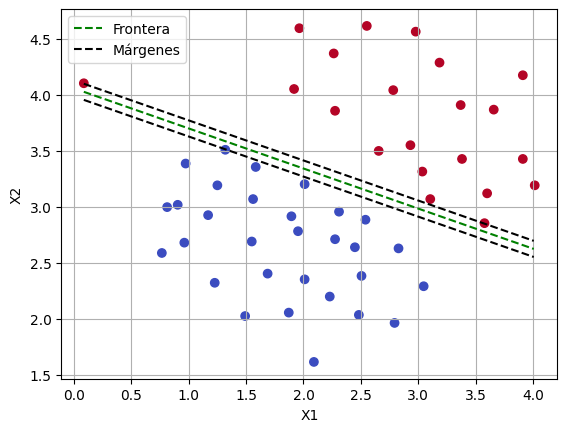

In [51]:
# b)

# Para la restriccion de que alpha_i >= 0
# Uso esto como un umbral para detectar vectores soporte
epsilon = 1e-7
epsilon2 = 1e-10

# Calculo X . X^T
X_XT = X @ X.T
y_yT = y @ y.T
# Calculo [y_i y_j] . [x_i^T x_j]
P = y_yT * X_XT
P = csc_matrix(P)

q = (-1.0)*np.ones((n_muestras, 1))

b = np.array([0.0])

A = y.T
A = csc_matrix(A)

G = (-1.0)*np.eye(n_muestras)
G = csc_matrix(G)

h = (-epsilon2) * np.ones(n_muestras)

alphas = qp.solve_qp(P=P, q=q, G=G, h=h, A=A, b=b, solver='cvxopt')
alphas = alphas.reshape(-1,1)


#Con el umbral definido antes, identifico los vectores soporte
support_vectors = np.where(alphas > epsilon)[0]

X_support = X[support_vectors]
y_support = y[support_vectors]
alphas_support = alphas[support_vectors]
n_support = len(support_vectors)

X1 = X[:,0].reshape(-1,1)
X2 = X[:,1].reshape(-1,1)


#Calculo w
w1 = np.sum(alphas*y*X1)
#w1=4.683781813124456
w2 = np.sum(alphas*y*X2)
#w2=13.09581272485201
w = np.array([w1, w2])

# Para calcular el b, si o si tengo q usar los vectores soporte que identifique antes
# Estoy teniendo un problema, y me parece que viene por el lado del calculo de b
# Valor de b del problema primal, para debuguear
#b1 = -52.235

b1 = np.mean(y_support - w @ X_support.T)
#b1=-53.15646547539322
pendiente = -w[0] / w[1]

ordenada = -b1 / w[1]

x = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o')
plt.plot(x, pendiente * x + ordenada, color='green', linestyle='--', label='Frontera')
plt.plot(x, pendiente * x + ordenada + 1/np.linalg.norm(w), color='black', linestyle='--', label='Márgenes')
plt.plot(x, pendiente * x + ordenada - 1/np.linalg.norm(w), color='black', linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()

#####
# Tengo un problema en alguna parte del codigo que me esta alterando los valores de
# w1, w2 y b, entonces cuando grafico me da mal. Pero el procedimiento creo que esta bien
#####

#####
# ERA EL SOLVER EL PROBLEMA
#####


C:\Users\joaqu\AppData\Local\Temp\ipykernel_19768\1147256422.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  G[i, n_features] = -y[i]


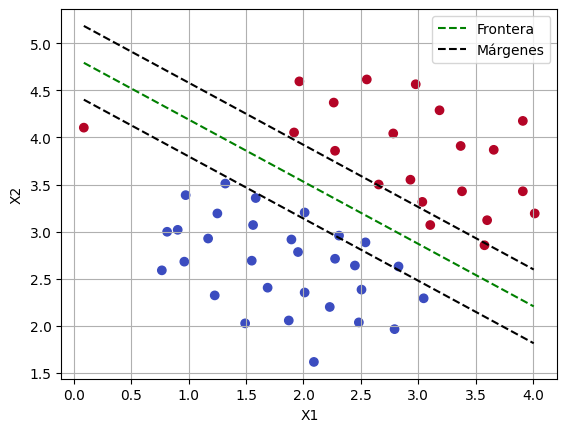

In [22]:
# c)

C = 1

P = np.zeros((n_features + 1 + n_muestras, n_features + 1 + n_muestras))
P[:n_features, :n_features] = np.eye(n_features)

q = np.hstack([np.zeros(n_features + 1), C * np.ones(n_muestras)])


# Matriz G y vector h para las restricciones
G = np.zeros((2 * n_muestras, n_features + 1 + n_muestras))
h = np.zeros(2 * n_muestras)

# Definición de las restricciones Gx ≤ h
for i in range(n_muestras):
    G[i, :n_features] = -y[i] * X[i]
    G[i, n_features] = -y[i]
    G[i, n_features + 1 + i] = -1
    G[n_muestras + i, n_features + 1 + i] = -1
    h[i] = -1

G = csc_matrix(G)
P = csc_matrix(P)
# Resolvemos el problema con solve_qp
solution = qp.solve_qp(P, q, G, h, solver='osqp')

# Extraemos los parámetros del modelo w y b
w = solution[:n_features]
b = solution[n_features]


pendiente = -w[0] / w[1]
ordenada = -b / w[1]


x = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01)


plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o')
plt.plot(x, pendiente * x + ordenada, color='green', linestyle='--', label='Frontera')
plt.plot(x, pendiente * x + ordenada + 1/np.linalg.norm(w), color='black', linestyle='--', label='Márgenes')
plt.plot(x, pendiente * x + ordenada - 1/np.linalg.norm(w), color='black', linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()



In [ ]:
# d) y e) Investigar problema dual

### Ejercicio 10

![image.png](enunciados/ej10.png)

In [42]:
# Cargamos los datos

with open('recursos/ejs_svm.pkl', 'rb') as file:
    data = pickle.load(file)

dataset2 = data['2do Dataset']
X = dataset2['X']
y = dataset2['y'].ravel()

# Convertir etiquetas a {-1, 1}
y = np.where(y == 0, -1, y)

#del data, dataset2, X, y, file

C:\Users\joaqu\AppData\Local\Temp\ipykernel_17656\3366268361.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


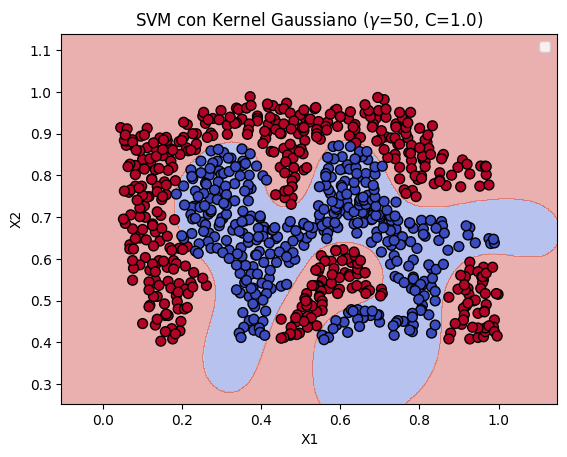

In [43]:
# Parametros

C = 1.0
gamma = 50

# Modelo SVM + entrenamiento
svm_model = SVC(kernel = 'rbf', C = C, gamma = gamma)
svm_model.fit(X, y)

# Grilla para la frontera
x_min, x_max = X[:, 0].min() - 0.15, X[:, 0].max() + 0.15
y_min, y_max = X[:, 1].min() - 0.15, X[:, 1].max() + 0.15
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Evaluo el modelo en la frontera
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Frontera de decisión
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)

# Scatter de las muestras
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f"SVM con Kernel Gaussiano ($\gamma$={gamma}, C={C})")
plt.legend()


#del C, gamma, svm_model, x_min, x_max, y_min, y_max, xx, yy, Z
